In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"
salt_type = 'MgSO4'

,index,building id,total cost - no TES,total cost - w TES,cost saving,cost saving %
0,4,5,2343.104016,2190.737819,152.366197,0.065028
1,133,134,2290.237201,2140.952951,149.284250,0.065183
2,287,288,2524.802218,2360.176075,164.626143,0.065204
3,385,386,2264.312348,2116.652281,147.660067,0.065212
4,399,400,2312.417210,2160.156160,152.261050,0.065845
...,...,...,...,...,...,...
395,364,365,276.717077,233.996005,42.721072,0.154385
396,338,339,230.379221,194.376398,36.002822,0.156276
397,210,211,209.135256,175.483479,33.651777,0.160909
398,304,305,183.538652,152.142117,31.396535,0.171062


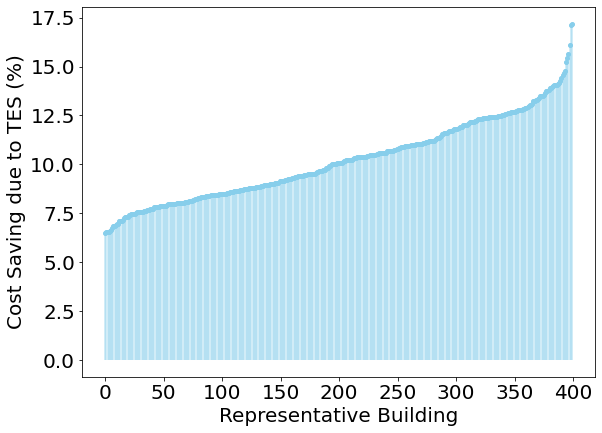

In [3]:
# Total costs:
cost_no_TES = pd.read_excel(ResultsFolder + "total cost all building - no TES.xlsx")
cost_files_w_TES = pd.read_excel(ResultsFolder + "total cost all building-"+salt_type+".xlsx")

# Clean up:
cost_no_TES = cost_no_TES.rename(columns={'Unnamed: 0': 'building id'})
cost_no_TES = cost_no_TES.sort_values(by=['building id'])
cost_no_TES = cost_no_TES.reset_index()
cost_no_TES = cost_no_TES[['building id', 'total cost ($)']]

cost_files_w_TES = cost_files_w_TES.rename(columns={'Unnamed: 0': 'building id'})
cost_files_w_TES = cost_files_w_TES.sort_values(by=['building id'])
cost_files_w_TES = cost_files_w_TES.reset_index()
cost_files_w_TES = cost_files_w_TES[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_no_TES['building id']
cost_impacts_TES['total cost - no TES'] = cost_no_TES['total cost ($)']
cost_impacts_TES['total cost - w TES'] = cost_files_w_TES['total cost ($)']
cost_impacts_TES['cost saving'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - w TES']
cost_impacts_TES['cost saving %'] = cost_impacts_TES['cost saving']/cost_impacts_TES['total cost - no TES']

#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()*10000
diff_all_cost = cost_impacts_TES["cost saving"].sum()*10000
pct_cost_saving = diff_all_cost/tot_cost_noTES

# Graph cost saving due to TES:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving %')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving %']*100)
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Cost Saving due to TES (%)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
pct_cost_saving
#cost_impacts_TES
diff_all_cost
ordered_cost

,index,building id,TES discharge,load,cost saving,TES fraction of load
0,4,5,23045.901646,59150.390389,0.065028,0.389615
1,133,134,22315.281078,57673.600182,0.065183,0.386924
2,287,288,25577.461422,63936.968704,0.065204,0.400042
3,385,386,21892.097865,56719.004778,0.065212,0.385975
4,399,400,22737.117278,57919.433045,0.065845,0.392565
...,...,...,...,...,...,...
395,364,365,3973.807274,6769.214631,0.154385,0.587041
396,338,339,3276.494786,5666.573658,0.156276,0.578214
397,210,211,2980.532084,5129.930228,0.160909,0.581008
398,304,305,2734.732373,4494.552000,0.171062,0.608455


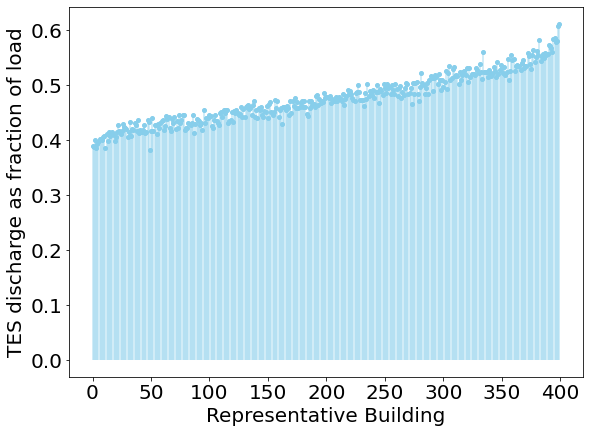

In [4]:
# Total TES discharge to serve load:
tes_discharge = pd.read_excel(ResultsFolder + "TES discharge-"+salt_type+".xlsx")
load = pd.read_excel(ResultsFolder + "load.xlsx")

ordered_tes_discharge = tes_discharge.sort_values(by='building id')
ordered_load = load.sort_values(by='building id')
ordered_tes_discharge = ordered_tes_discharge.reset_index()
ordered_load = ordered_load.reset_index()

# Find TES discharge as fraction of load:
tes_load_combined = pd.DataFrame()
tes_load_combined['building id'] = ordered_load['building id']
tes_load_combined['TES discharge'] = ordered_tes_discharge['TES discharge']
tes_load_combined['load'] = ordered_load['Load']
tes_load_combined['cost saving'] = cost_impacts_TES['cost saving %']
tes_load_combined['TES fraction of load'] = tes_load_combined['TES discharge']/tes_load_combined['load']
ordered_tes_load_combined = tes_load_combined.sort_values(by='cost saving')

# Graph TES as fraction of load
fig, ax = plt.subplots(figsize=(9.2,6.8))
ordered_tes_load_combined = ordered_tes_load_combined.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['TES fraction of load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("TES discharge as fraction of load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ordered_tes_load_combined

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

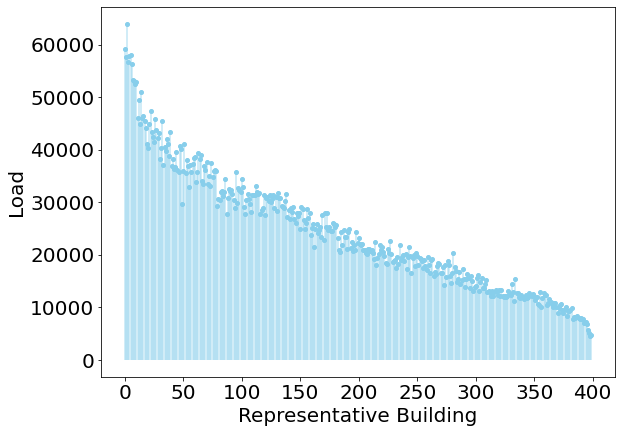

In [5]:
# Graph Load
fig, ax = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [6]:
# HP output:
hp_noTES = pd.read_excel(ResultsFolder + "hp_output - no TES.xlsx")
hp_TES = pd.read_excel(ResultsFolder + "hp_output-"+ salt_type +".xlsx")
hp_noTES = hp_noTES.sort_values(by='building id')
hp_noTES = hp_noTES.reset_index()
hp_TES = hp_TES.sort_values(by='building id')
hp_TES = hp_TES.reset_index()
hp_TES = hp_TES.rename(columns={'HP total': 'HP total - w/TES'})
hp_noTES = hp_noTES.rename(columns={'HP to load': 'HP total - no TES'})
hp_TES['HP total - no TES'] = hp_noTES['HP total - no TES']
hp_TES['cost saving %'] = cost_impacts_TES['cost saving %']
hp_TES['delta HP'] = (hp_TES['HP total - w/TES'] - hp_TES['HP total - no TES'])/hp_TES['HP total - no TES']
hp_TES_sorted = hp_TES.sort_values(by='cost saving %')
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted = hp_TES_sorted.rename(columns={'index': 'building sorted'})
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted

,index,level_0,building sorted,Unnamed: 0,building id,HP to load,HP to TES,HP total - w/TES,HP total - no TES,cost saving %,delta HP
0,0,4,67,0,5,36104.488742,23516.226170,59620.714912,59150.390389,0.065028,0.007951
1,1,133,171,0,134,35358.319104,22770.694977,58129.014081,57673.600182,0.065183,0.007896
2,2,287,106,0,288,38359.507282,26099.450431,64458.957713,63936.968704,0.065204,0.008164
3,3,385,305,0,386,34826.906913,22338.875373,57165.782286,56719.004778,0.065212,0.007877
4,4,399,186,0,400,35182.315767,23201.140080,58383.455847,57919.433045,0.065845,0.008012
...,...,...,...,...,...,...,...,...,...,...,...
395,395,364,388,0,365,2795.407357,4054.905381,6850.312738,6769.214631,0.154385,0.011980
396,396,338,61,0,339,2390.078871,3343.362027,5733.440898,5666.573658,0.156276,0.011800
397,397,210,183,0,211,2149.398145,3041.359269,5190.757414,5129.930228,0.160909,0.011857
398,398,304,108,0,305,1759.819627,2790.543238,4550.362865,4494.552000,0.171062,0.012417


,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass,SrBr2 Salt Mass E,SrBr2 Salt Mass P,SrBr2 Salt Mass
0,304,0,305,2.931349,5.995942,1.448295,5.995942,15.162151,34.529722,34.529722,15.868958,1.791712,15.868958,9.681521,40.751969,40.751969
1,210,0,211,3.267824,6.684185,1.614537,6.684185,16.902537,38.493211,38.493211,17.690475,1.997373,17.690475,10.792812,45.429678,45.429678
2,233,0,234,3.335892,6.823415,1.648168,6.823415,17.254614,39.295018,39.295018,18.058964,2.038978,18.058964,11.017625,46.375970,46.375970
3,338,0,339,3.346160,6.844418,1.653241,6.844418,17.307724,39.415969,39.415969,18.114550,2.045254,18.114550,11.051537,46.518717,46.518717
4,99,0,100,4.456120,9.114792,2.201641,9.114792,23.048899,52.490707,52.490707,24.123359,2.723689,24.123359,14.717462,61.949520,61.949520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,55.924812,13.508409,55.924812,141.419065,322.062538,322.062538,148.011533,16.711494,148.011533,90.300614,380.098129,380.098129
396,0,0,1,27.724174,56.708539,13.697715,56.708539,143.400902,326.575900,326.575900,150.085756,16.945688,150.085756,91.566081,385.424797,385.424797
397,4,0,5,27.902137,57.072554,13.785641,57.072554,144.321400,328.672208,328.672208,151.049165,17.054463,151.049165,92.153848,387.898860,387.898860
398,399,0,400,28.411462,58.114355,14.037284,58.114355,146.955840,334.671783,334.671783,153.806413,17.365775,153.806413,93.836023,394.979557,394.979557


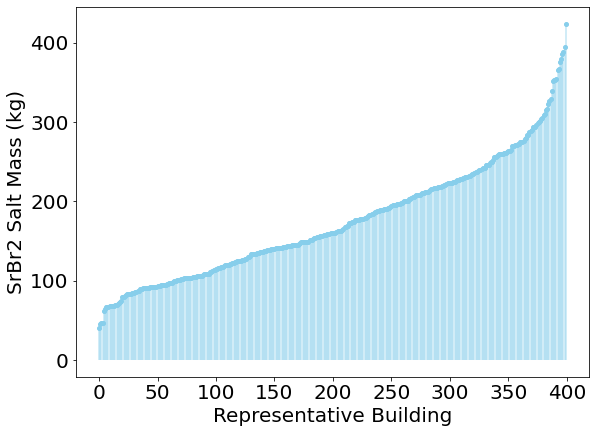

In [15]:
# HP output - no TES:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(hp_TES_sorted['index'], hp_TES_sorted['delta HP'], label = "Change in total HP output due to TES")
#plt.plot(hp_TES_sorted['index'], hp_TES_sorted['HP total - w/TES'], label = "Total HP Output - w/ TES")
plt.legend(loc='upper right')
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)